# Assignment

### Ans

In [27]:
# Load the dataset
import pandas as pd
df = pd.read_csv('wine.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [28]:
# splitting the data
y = df.pop(0)
X = df

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=24)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [34]:
X_train.head()

,0,1,2,3,4,5
0,-3.877202,-0.274480,0.343666,0.033464,-0.369898,-1.417197
1,2.224833,-2.362849,0.892236,-0.902976,0.037521,-0.051579
2,4.318918,-2.016585,-1.339730,0.337557,-1.380955,0.326597
3,-0.548462,1.936047,1.337350,-0.266552,-0.611463,0.199454
4,-1.168646,1.757168,0.980912,-0.404676,-0.742868,-0.063381


In [35]:
print(pca.explained_variance_ratio_)

[0.37961988 0.194408   0.18301021 0.11840069 0.04248649 0.02850762]


In [36]:
# Loat the dataset and preprocess again
df = pd.read_csv('wine.data', sep=',', header=None)

y=df.pop(0)
X=df

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=24)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [37]:
# write a function for finding optimal number of principal components
def opt_no_comp(X_train):
    count = 0
    for i in range(1,12):
        pca = PCA(n_components=i)
        pca.fit_transform(X_train)
        count+=1
        if sum(pca.explained_variance_ratio_)>0.90:
            break
    return count
    

In [38]:
opt_no = opt_no_comp(X_train)
print(f"The number of pca comp that will capture 90% variance ratio is : {opt_no}")

The number of pca comp that will capture 90% variance ratio is : 8


In [39]:
# Lets transform our data now 
pca = PCA(n_components=8)

X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))

In [40]:
# lets that we captured over 90% variance ratio
print(sum(pca.explained_variance_ratio_)*100)

91.83458918125143


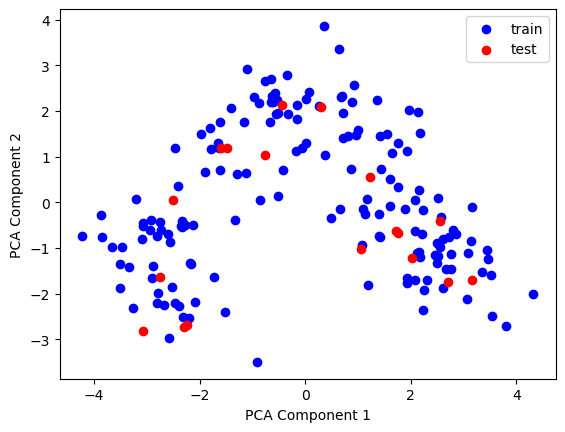

In [45]:
# Visualization

import matplotlib.pyplot as plt

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c='blue', label='train')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:,1 ], c='red', label='test')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [46]:
# Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

train_labels = kmeans.labels_

test_labels = kmeans.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [47]:
test_labels

array([1, 2, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 2, 2, 1])

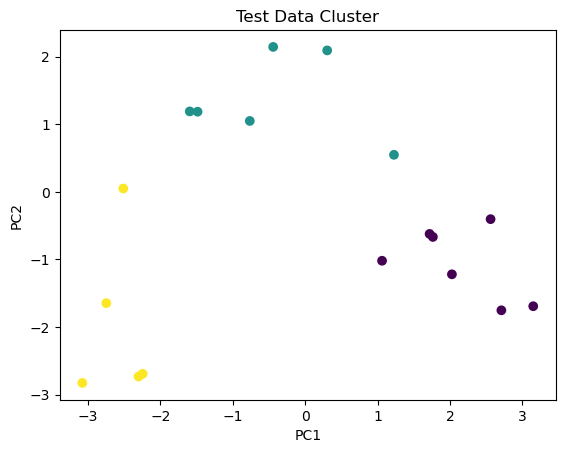

In [50]:
import matplotlib.pyplot as plt
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_labels)
plt.title('Test Data Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- As we can see in the graph the points that are closer to each other have been together into a single cluster.